In [1]:
using DrWatson
quickactivate(pwd(), "LArAnalysis")
using DelimitedFiles, CairoMakie, Dates, UnROOT, FHist, LsqFit, Statistics

include(srcdir("fit_functions.jl"))
include(srcdir("cal_helpers.jl"));

In [2]:
kr_results = custom_parse.(readdlm(datadir("cal_results", "gain_match.txt"); comments=true))

35×4 Matrix{Float64}:
      1.00001e6  1.65273e9  0.93539   0.00172338
      1.00129e6  1.65351e9  0.987925  0.000890173
      1.00255e6  1.65462e9  1.01404   0.000636636
      1.00406e6  1.65584e9  1.02215   0.000646784
      1.00531e6  1.65713e9  1.02875   0.000672895
      1.00601e6  1.65824e9  1.02725   0.000650429
      1.00742e6  1.65945e9  1.03416   0.000714881
      1.00893e6  1.66145e9  1.18906   0.0289064
      1.00998e6  1.66188e9  1.22238   0.000815049
      1.0113e6   1.66309e9  1.22088   0.000486499
      ⋮                               
 404925.0        1.56572e9  1.08969   0.000405206
 602188.0        1.58802e9  1.1026    0.0143839
 606443.0        1.59052e9  1.17945   0.0198144
 619370.0        1.60019e9  1.02005   0.00102369
 622354.0        1.6026e9   0.985524  0.00463318
 627387.0        1.60685e9  0.979219  0.00852426
 702014.0        1.61229e9  1.11341   0.0188513
 714950.0        1.62256e9  1.03866   0.00816424
 900015.0        1.64736e9  0.926684  0.00194613

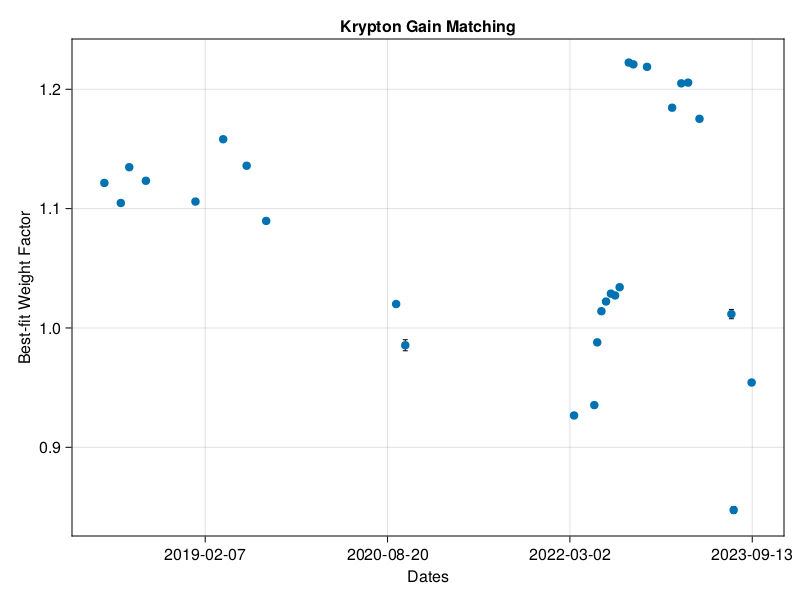

In [15]:
xtic = LinRange(datetime2unix(DateTime(2017, 7, 28)), datetime2unix(now()), 5)
xticd = unix2datetime.(xtic)
xticd = Dates.format.(xticd, "yyyy-mm-dd")
f = Figure()
ax = Axis(f[1, 1], xticks=(xtic, xticd), title="Krypton Gain Matching", ylabel="Best-fit Weight Factor", xlabel="Dates")
xd = kr_results[:, 2]
yd = kr_results[:, 3]
ed = kr_results[:, 4]
cutoff = std(kr_results[:, 4])
mask = ed .< cutoff
errorbars!(kr_results[:, 2][mask], kr_results[:, 3][mask], kr_results[:, 4][mask]; linewidth=1, whiskerwidth=5)
scatter!(kr_results[:, 2][mask], kr_results[:, 3][mask])
# vspan!(datetime2unix(DateTime(2017, 7, 28)), 1595224800, color=(:red, 0.2))
# vspan!(1595224800, 1646754200, color=(:blue, 0.2))
# vspan!(1646754200, datetime2unix(now()), color=(:green, 0.2))
f

In [17]:
dt = Dates.format(now(), "yyyymmdd")
save(plotsdir("gain_match_$dt.pdf"), f)

CairoMakie.Screen{PDF}


Looking at the error on the gain matching runs

mean((kr_results[:, 4])[mask_kr]) = 0.00442847191656022
std((kr_results[:, 4])[mask_kr]) = 0.007445135504692427


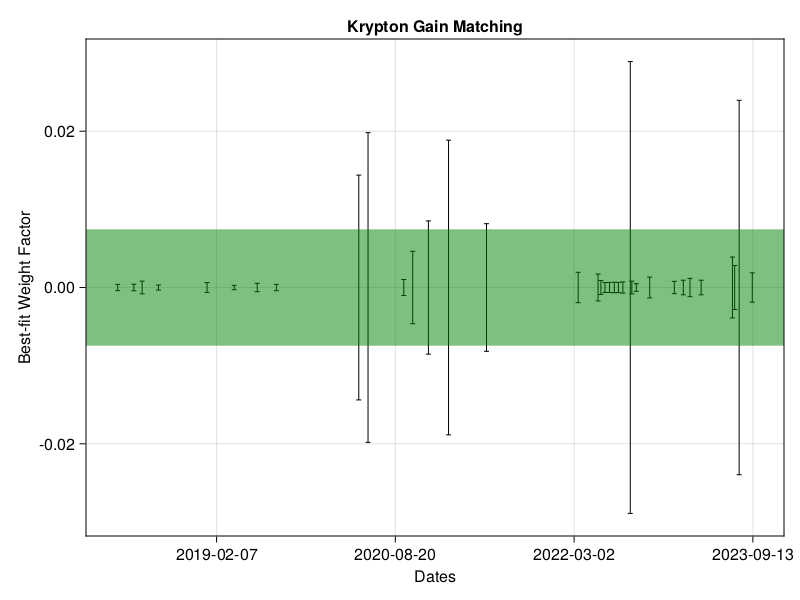

In [10]:
mask_kr = .~(ismissing.(kr_results[:, 3]))
xtic = LinRange(datetime2unix(DateTime(2017, 7, 28)), datetime2unix(now()), 5)
xticd = unix2datetime.(xtic)
xticd = Dates.format.(xticd, "yyyy-mm-dd")
f = Figure()
ax = Axis(f[1, 1], xticks=(xtic, xticd), title="Krypton Gain Matching", ylabel="Best-fit Weight Factor", xlabel="Dates")
@show mean(kr_results[:, 4][mask_kr]) std(kr_results[:, 4][mask_kr])
s = std(kr_results[:, 4][mask_kr])
errorbars!(kr_results[:, 2][mask_kr], zeros(length(kr_results[:, 3][mask_kr])), kr_results[:, 4][mask_kr]; linewidth=1, whiskerwidth=5)
hspan!(-s, s, color=(:green, 0.5))
f

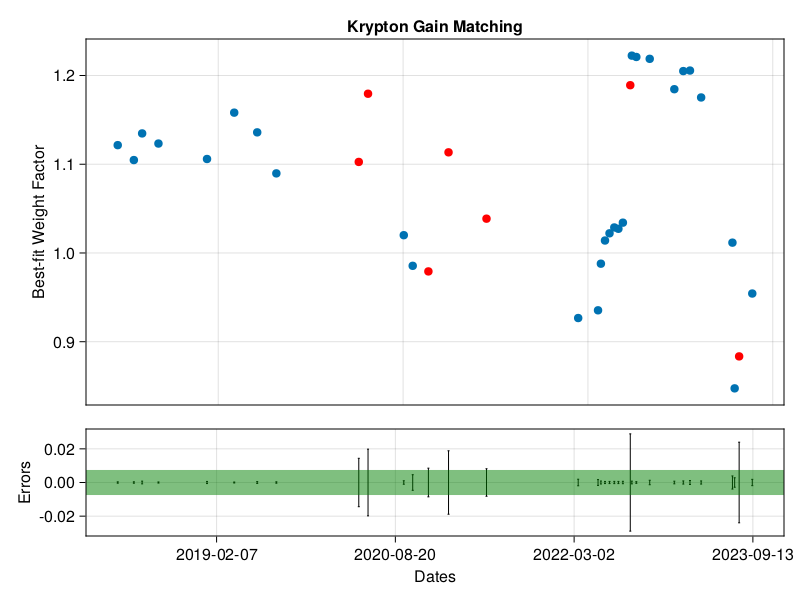

In [18]:
xtic = LinRange(datetime2unix(DateTime(2017, 7, 28)), datetime2unix(now()), 5)
xticd = unix2datetime.(xtic)
xticd = Dates.format.(xticd, "yyyy-mm-dd")
f = Figure()
ax = Axis(f[1:3, 1], title="Krypton Gain Matching", ylabel="Best-fit Weight Factor")
hidexdecorations!(ax, grid=false)
xd = kr_results[:, 2]
yd = kr_results[:, 3]
ed = kr_results[:, 4]
cutoff = std(kr_results[:, 4])
mask = ed .< cutoff
scatter!(kr_results[:, 2][mask], kr_results[:, 3][mask])
scatter!(kr_results[:, 2][.~mask], kr_results[:, 3][.~mask], color=:red)
ax = Axis(f[4, 1], xlabel="Dates", xticks=(xtic, xticd), ylabel="Errors")
s = std(kr_results[:, 4])
errorbars!(ax, kr_results[:, 2], zeros(length(kr_results[:, 3])), kr_results[:, 4]; linewidth=1, whiskerwidth=2)
hspan!(ax, -s, s, color=(:green, 0.5))
f

## Testing individual runs

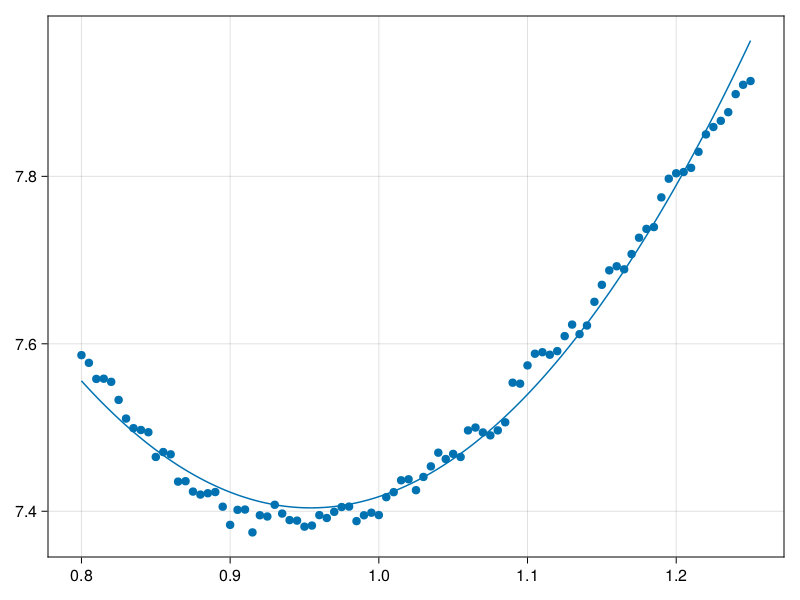

In [18]:
gainmatch(datadir("exp_pro", "Krypton_1401.root"))